<a href="https://colab.research.google.com/github/patchstreet/patchstreet/blob/main/Digitaltwinipynb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np

load

In [2]:
df=pd.read_csv('/content/digital_twin_gas_sensor_data_realistic.csv')
df.head()

,Sensor Type,Gas Concentration (ppm),Temperature (°C),Humidity (%),Voltage (V),Current (mA),Alarm Triggered (0/1)
0,MQ2,392,26.288699,57.964747,4.703328,11.034447,1
1,MQ135,474,23.376620,46.491631,4.807513,17.338760,1
2,MQ2,186,29.202678,46.765081,5.287150,16.373987,0
3,MQ2,446,22.930083,70.731669,5.239678,11.016441,1
4,MQ2,298,33.435005,72.296535,4.962295,17.990764,0


preprocess

In [3]:
df.isnull().sum()
df=df.dropna()



In [4]:
print(df.columns)


Index(['Sensor Type', 'Gas Concentration (ppm)', 'Temperature (°C)',
       'Humidity (%)', 'Voltage (V)', 'Current (mA)', 'Alarm Triggered (0/1)'],
      dtype='object')


Feature Selection


In [5]:
features=df[['Sensor Type', 'Gas Concentration (ppm)',
       'Temperature (°C)', 'Humidity (%)', 'Voltage (V)', 'Current (mA)']]
target=df['Alarm Triggered (0/1)']

One-hot encoding

In [6]:
from sklearn.preprocessing import OneHotEncoder
encoder=OneHotEncoder()
encoded_features=encoder.fit_transform(df[['Sensor Type']]).toarray()
features = np.hstack((encoded_features, df[['Gas Concentration (ppm)',
       'Temperature (°C)', 'Humidity (%)', 'Voltage (V)', 'Current (mA)']].values))


Scaling

In [7]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)

Train Test Split

In [8]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(features_scaled, target, test_size=0.2, random_state=42)

KNN Model

In [9]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
y_pred_knn = knn.predict(X_test)

SVM model

In [10]:
from sklearn.svm import SVC
model=SVC()
model.fit(X_train,y_train)
y_pred=model.predict(X_test)
y_pred

array([1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1,
       0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0,
       0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0,
       0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0,
       1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1,
       0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1,
       0, 1])

In [11]:
y_test

,Alarm Triggered (0/1)
521,1
737,1
740,0
660,0
411,1
...,...
408,1
332,1
208,1
613,0


VISUALIZATION

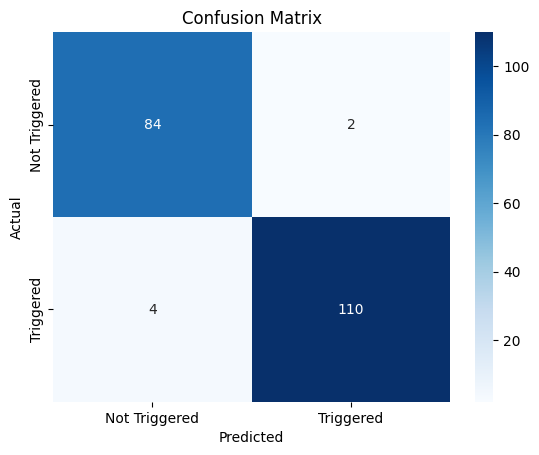

In [12]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt


cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Not Triggered', 'Triggered'], yticklabels=['Not Triggered', 'Triggered'])
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix')
plt.show()


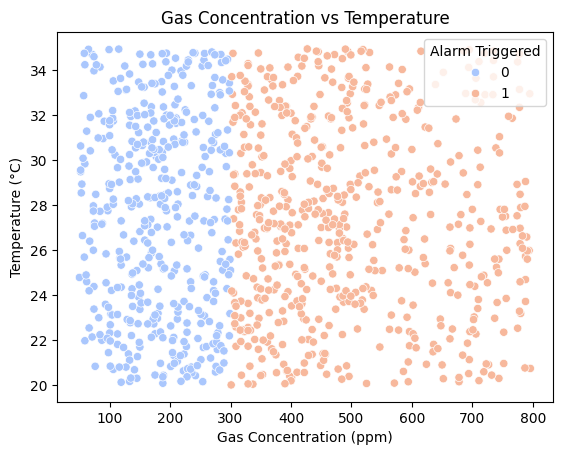

In [13]:
sns.scatterplot(x='Gas Concentration (ppm)', y='Temperature (°C)', hue='Alarm Triggered (0/1)', data=df, palette='coolwarm')
plt.title('Gas Concentration vs Temperature')
plt.xlabel('Gas Concentration (ppm)')
plt.ylabel('Temperature (°C)')
plt.legend(title='Alarm Triggered')
plt.show()


ACCURACY

KNN model

In [14]:
from sklearn.metrics import accuracy_score
print("Accuracy:", accuracy_score(y_test, y_pred_knn))

Accuracy: 0.945


SVM model

In [15]:
print("Accuracy:", accuracy_score(y_test, y_pred))

Accuracy: 0.97


precison,recall and f1 scores

SVM model

In [16]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.95      0.98      0.97        86
           1       0.98      0.96      0.97       114

    accuracy                           0.97       200
   macro avg       0.97      0.97      0.97       200
weighted avg       0.97      0.97      0.97       200



KNN model

In [18]:
print(classification_report(y_test,y_pred_knn))

              precision    recall  f1-score   support

           0       0.92      0.95      0.94        86
           1       0.96      0.94      0.95       114

    accuracy                           0.94       200
   macro avg       0.94      0.95      0.94       200
weighted avg       0.95      0.94      0.95       200



In [19]:
new_data = {
    'Sensor Type': ['MQ2'],
    'Gas Concentration (ppm)': [200],
    'Temperature (°C)': [35],
    'Humidity (%)': [45],
    'Voltage (V)': [5],
    'Current (mA)': [150]
}
new_df = pd.DataFrame(new_data)
encoded_new_data = encoder.transform(new_df[['Sensor Type']]).toarray()
new_features = np.hstack((encoded_new_data, new_df[['Gas Concentration (ppm)',
                                                    'Temperature (°C)',
                                                    'Humidity (%)',
                                                    'Voltage (V)',
                                                    'Current (mA)']].values))
new_features_scaled = scaler.transform(new_features)
knn_prediction = knn.predict(new_features_scaled)
print("KNN Prediction:", "Triggered" if knn_prediction[0] == 1 else "Not Triggered")
svm_prediction = model.predict(new_features_scaled)
print("SVM Prediction:", "Triggered" if svm_prediction[0] == 1 else "Not Triggered")


KNN Prediction: Not Triggered
SVM Prediction: Not Triggered
